In [9]:
import pandas as pd

data = pd.read_csv("./step_delay_mapping.csv")

model_exec_times = pd.read_parquet("../edgedroid/data/resources/model_exec_times.parquet")
neuro = model_exec_times.groupby(["run_id", "neuroticism"], observed=True).count().reset_index().drop(columns=["ttf", "exec_time"]).set_index("run_id")

data = data.join(other=neuro, on="participant", how="left")
data

,participant,abs_seq,start,end,duration,delay,block,block_seq,exec_time,neuroticism
0,134146,0,2019-11-15 19:19:22.728000+00:00,2019-11-15 19:19:27.019000+00:00,0 days 00:00:04.291000,0 days 00:00:00,0,0,0 days 00:00:03.029000,0.375
1,134146,1,2019-11-15 19:19:27.019000+00:00,2019-11-15 19:19:32.013000+00:00,0 days 00:00:04.994000,0 days 00:00:00,1,0,0 days 00:00:04.004000,0.375
2,134146,2,2019-11-15 19:19:32.013000+00:00,2019-11-15 19:19:35.520000+00:00,0 days 00:00:03.507000,0 days 00:00:00,1,1,0 days 00:00:02.625000,0.375
3,134146,3,2019-11-15 19:19:35.520000+00:00,2019-11-15 19:19:41.515000+00:00,0 days 00:00:05.995000,0 days 00:00:00,1,2,0 days 00:00:04.680000,0.375
4,134146,4,2019-11-15 19:19:41.515000+00:00,2019-11-15 19:19:47.301000+00:00,0 days 00:00:05.786000,0 days 00:00:00,1,3,0 days 00:00:05.197000,0.375
...,...,...,...,...,...,...,...,...,...,...
6755,137353,164,2019-11-26 18:59:22.272000+00:00,2019-11-26 18:59:29.299000+00:00,0 days 00:00:07.027000,0 days 00:00:00,21,7,0 days 00:00:06.358000,0.625
6756,137353,165,2019-11-26 18:59:29.299000+00:00,2019-11-26 18:59:34.517000+00:00,0 days 00:00:05.218000,0 days 00:00:00,21,8,0 days 00:00:03.840000,0.625
6757,137353,166,2019-11-26 18:59:34.517000+00:00,2019-11-26 18:59:38.547000+00:00,0 days 00:00:04.030000,0 days 00:00:00,21,9,0 days 00:00:02.932000,0.625
6758,137353,167,2019-11-26 18:59:38.547000+00:00,2019-11-26 18:59:41.454000+00:00,0 days 00:00:02.907000,0 days 00:00:00,21,10,0 days 00:00:01.874000,0.625


In [10]:
data = data.drop(columns=["start", "end", "duration"], errors="ignore")
data["participant"] = data["participant"].astype("category")
data["delay"] = pd.to_timedelta(data["delay"]).dt.total_seconds()
data["exec_time"] = pd.to_timedelta(data["exec_time"]).dt.total_seconds()
data

,participant,abs_seq,delay,block,block_seq,exec_time,neuroticism
0,134146,0,0.0,0,0,3.029,0.375
1,134146,1,0.0,1,0,4.004,0.375
2,134146,2,0.0,1,1,2.625,0.375
3,134146,3,0.0,1,2,4.680,0.375
4,134146,4,0.0,1,3,5.197,0.375
...,...,...,...,...,...,...,...
6755,137353,164,0.0,21,7,6.358,0.625
6756,137353,165,0.0,21,8,3.840,0.625
6757,137353,166,0.0,21,9,2.932,0.625
6758,137353,167,0.0,21,10,1.874,0.625


In [11]:
data["ttf"] = 1.5 * data["delay"]
data

,participant,abs_seq,delay,block,block_seq,exec_time,neuroticism,ttf
0,134146,0,0.0,0,0,3.029,0.375,0.0
1,134146,1,0.0,1,0,4.004,0.375,0.0
2,134146,2,0.0,1,1,2.625,0.375,0.0
3,134146,3,0.0,1,2,4.680,0.375,0.0
4,134146,4,0.0,1,3,5.197,0.375,0.0
...,...,...,...,...,...,...,...,...
6755,137353,164,0.0,21,7,6.358,0.625,0.0
6756,137353,165,0.0,21,8,3.840,0.625,0.0
6757,137353,166,0.0,21,9,2.932,0.625,0.0
6758,137353,167,0.0,21,10,1.874,0.625,0.0


In [12]:
import numpy as np

data["duration"] = pd.cut(data["block_seq"] + 1, bins=[-np.inf, 5, 9, np.inf], right=False)
data["neuro"] = pd.cut(data["neuroticism"], bins=[-np.inf, .5, np.inf], right=False)
data

,participant,abs_seq,delay,block,block_seq,exec_time,neuroticism,ttf,duration,neuro
0,134146,0,0.0,0,0,3.029,0.375,0.0,"[-inf, 5.0)","[-inf, 0.5)"
1,134146,1,0.0,1,0,4.004,0.375,0.0,"[-inf, 5.0)","[-inf, 0.5)"
2,134146,2,0.0,1,1,2.625,0.375,0.0,"[-inf, 5.0)","[-inf, 0.5)"
3,134146,3,0.0,1,2,4.680,0.375,0.0,"[-inf, 5.0)","[-inf, 0.5)"
4,134146,4,0.0,1,3,5.197,0.375,0.0,"[-inf, 5.0)","[-inf, 0.5)"
...,...,...,...,...,...,...,...,...,...,...
6755,137353,164,0.0,21,7,6.358,0.625,0.0,"[5.0, 9.0)","[0.5, inf)"
6756,137353,165,0.0,21,8,3.840,0.625,0.0,"[9.0, inf)","[0.5, inf)"
6757,137353,166,0.0,21,9,2.932,0.625,0.0,"[9.0, inf)","[0.5, inf)"
6758,137353,167,0.0,21,10,1.874,0.625,0.0,"[9.0, inf)","[0.5, inf)"


In [13]:
output = data[["participant", "ttf", "exec_time", "duration", "neuro"]].copy()
output[["duration", "neuro"]] = output[["duration", "neuro"]].astype(pd.IntervalDtype())
output.to_parquet("../edgedroid/data/resources/curve_fitting_data.parquet")

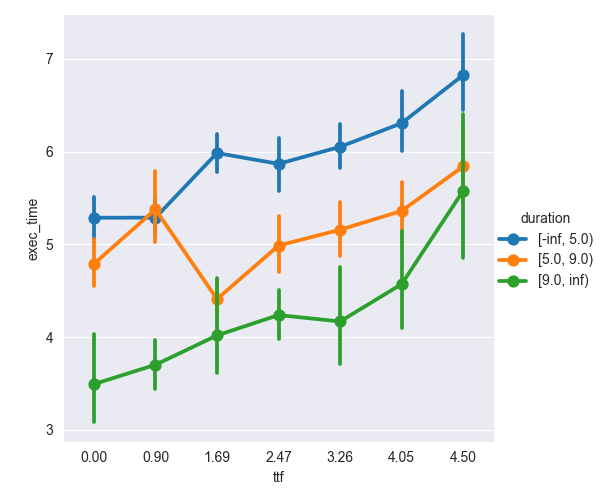

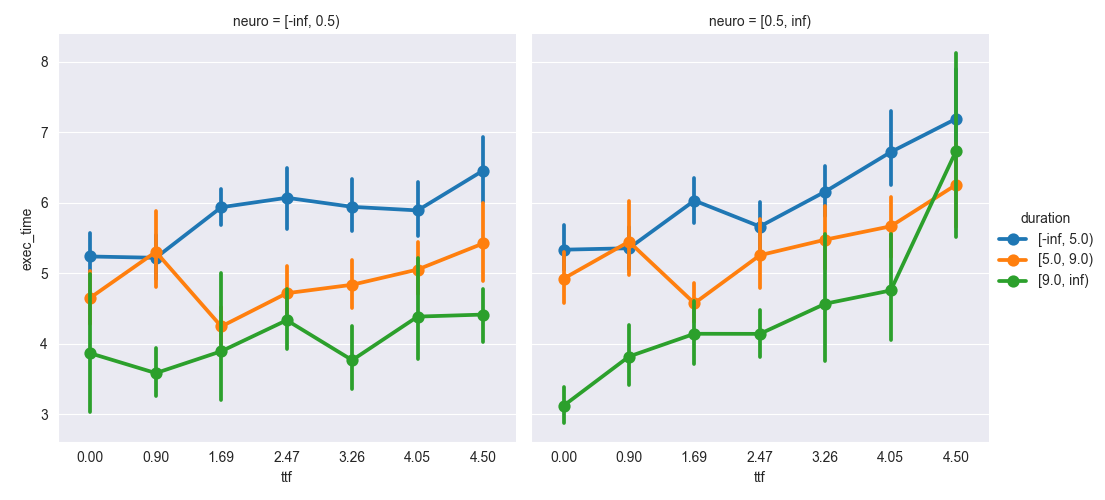

/var/folders/v3/rwb_fz_54x920ydszrlcxw1m0000gn/T/ipykernel_61984/4173265179.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_per_duration = data.groupby(["duration", "ttf", "neuro"])["exec_time"].mean()


duration     ttf     neuro      
[-inf, 5.0)  0.0000  [-inf, 0.5)    5.238396
                     [0.5, inf)     5.334892
             0.9000  [-inf, 0.5)    5.219787
                     [0.5, inf)     5.355146
             1.6875  [-inf, 0.5)    5.936863
                     [0.5, inf)     6.031567
             2.4750  [-inf, 0.5)    6.071175
                     [0.5, inf)     5.663542
             3.2625  [-inf, 0.5)    5.942358
                     [0.5, inf)     6.159350
             4.0500  [-inf, 0.5)    5.891717
                     [0.5, inf)     6.719742
             4.5000  [-inf, 0.5)    6.456396
                     [0.5, inf)     7.192533
[5.0, 9.0)   0.0000  [-inf, 0.5)    4.654094
                     [0.5, inf)     4.923875
             0.9000  [-inf, 0.5)    5.304406
                     [0.5, inf)     5.448444
             1.6875  [-inf, 0.5)    4.245819
                     [0.5, inf)     4.574869
             2.4750  [-inf, 0.5)    4.717481
                     [

In [14]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import numpy as np

ttfs = np.sort(data["ttf"].unique())

fg = sns.catplot(data=data, x="ttf", y="exec_time", hue="duration", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ticks=ax.get_xticks(), labels=[f"{t:0.2f}" for t in ttfs])
plt.show()

fg = sns.catplot(data=data, x="ttf", y="exec_time", hue="duration", col="neuro", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ticks=ax.get_xticks(), labels=[f"{t:0.2f}" for t in ttfs])
plt.show()

means_per_duration = data.groupby(["duration", "ttf", "neuro"])["exec_time"].mean()
means_per_duration

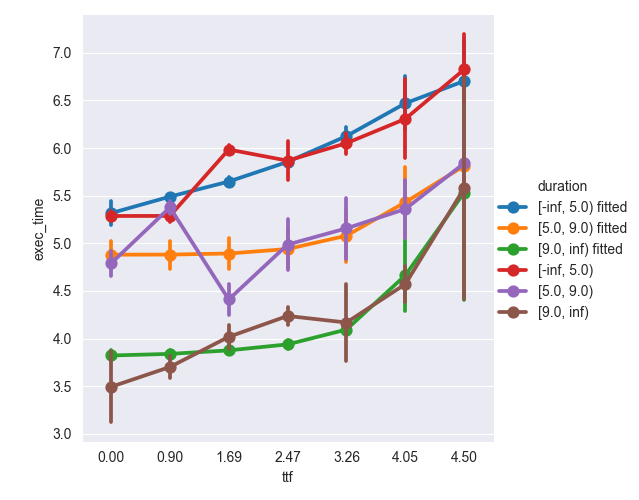

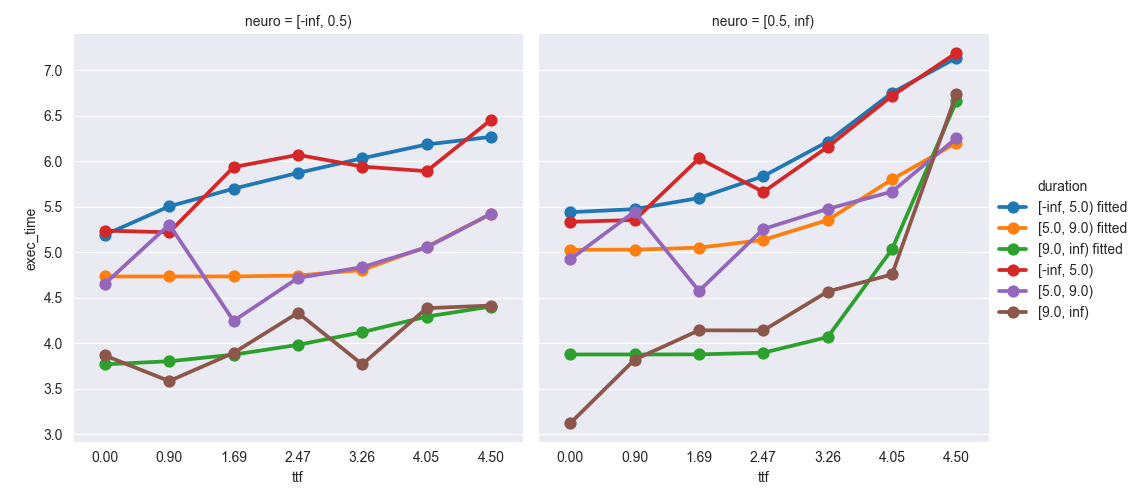

,duration,neuro,a,b,c
0,"[-inf, 5.0)","[-inf, 0.5)",0.339233,0.767987,5.192175
1,"[-inf, 5.0)","[0.5, inf)",0.043645,2.433488,5.440907
2,"[5.0, 9.0)","[-inf, 0.5)",0.000017,7.067601,4.734234
3,"[5.0, 9.0)","[0.5, inf)",0.002950,3.981878,5.027276
4,"[9.0, inf)","[-inf, 0.5)",0.041133,1.820432,3.768310
5,"[9.0, inf)","[0.5, inf)",0.000010,8.333157,3.876860


In [15]:
from scipy.optimize import curve_fit
from collections import deque

def func(x, a, b, c):
    return a * np.power(x, b) + c

rows = deque()
coefs = deque()

for (duration, neuro), data in means_per_duration.reset_index().groupby(["duration", "neuro"], observed=True):
    opt, cov = curve_fit(func, xdata=data["ttf"], ydata=data["exec_time"])
    coefs.append({"duration": duration, "neuro": neuro, "a": opt[0], "b": opt[1], "c": opt[2]})
    
    for ttf in data["ttf"]:
        fitted_exec_time = func(ttf, *opt)
        rows.append({"duration": duration, "neuro": neuro, "ttf": ttf, "exec_time": fitted_exec_time})

coefs_df = pd.DataFrame(coefs)
fitted_means = pd.DataFrame(rows)
comp_means = fitted_means.copy()
comp_means["duration"] = comp_means["duration"].apply(lambda s: f"{s} fitted")

comp_means = pd.concat((comp_means, means_per_duration.reset_index()), axis=0)


ttfs = np.sort(data["ttf"].unique())

fg = sns.catplot(data=comp_means, x="ttf", y="exec_time", hue="duration", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ticks=ax.get_xticks(), labels=[f"{t:0.2f}" for t in ttfs])
plt.show()

fg = sns.catplot(data=comp_means, x="ttf", y="exec_time", hue="duration", col="neuro", kind="point")
for ax in fg.axes.flat:
    ax.set_xticks(ticks=ax.get_xticks(), labels=[f"{t:0.2f}" for t in ttfs])
plt.show()


coefs_df

In [16]:
coefs_df.to_parquet("../edgedroid/data/resources/fitted_coefs.parquet")